<a href="https://colab.research.google.com/github/ashok1119/CRT-PROJ/blob/main/healthcare21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
health = pd.read_csv("/content/health.csv")

In [2]:
health

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [3]:
health.drop(columns=['Name'], inplace=True)
health

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
print("rows:",len(health))
print("columns:",len(health.columns))

rows: 55500
columns: 14


In [5]:
health["Billing Amount"].mean()


np.float64(25539.316097211795)

In [6]:
health["Billing Amount"].mode()


,Billing Amount
0,-1316.618581
1,-1310.272895
2,-887.024219
3,-676.852502
4,-591.917419
...,...
5495,51280.992946
5496,51431.977179
5497,51975.968135
5498,52170.036854


In [7]:
health["Billing Amount"].median()

25538.069375965664

In [8]:
health.isna().sum()

,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0
Room Number,0


<Axes: >

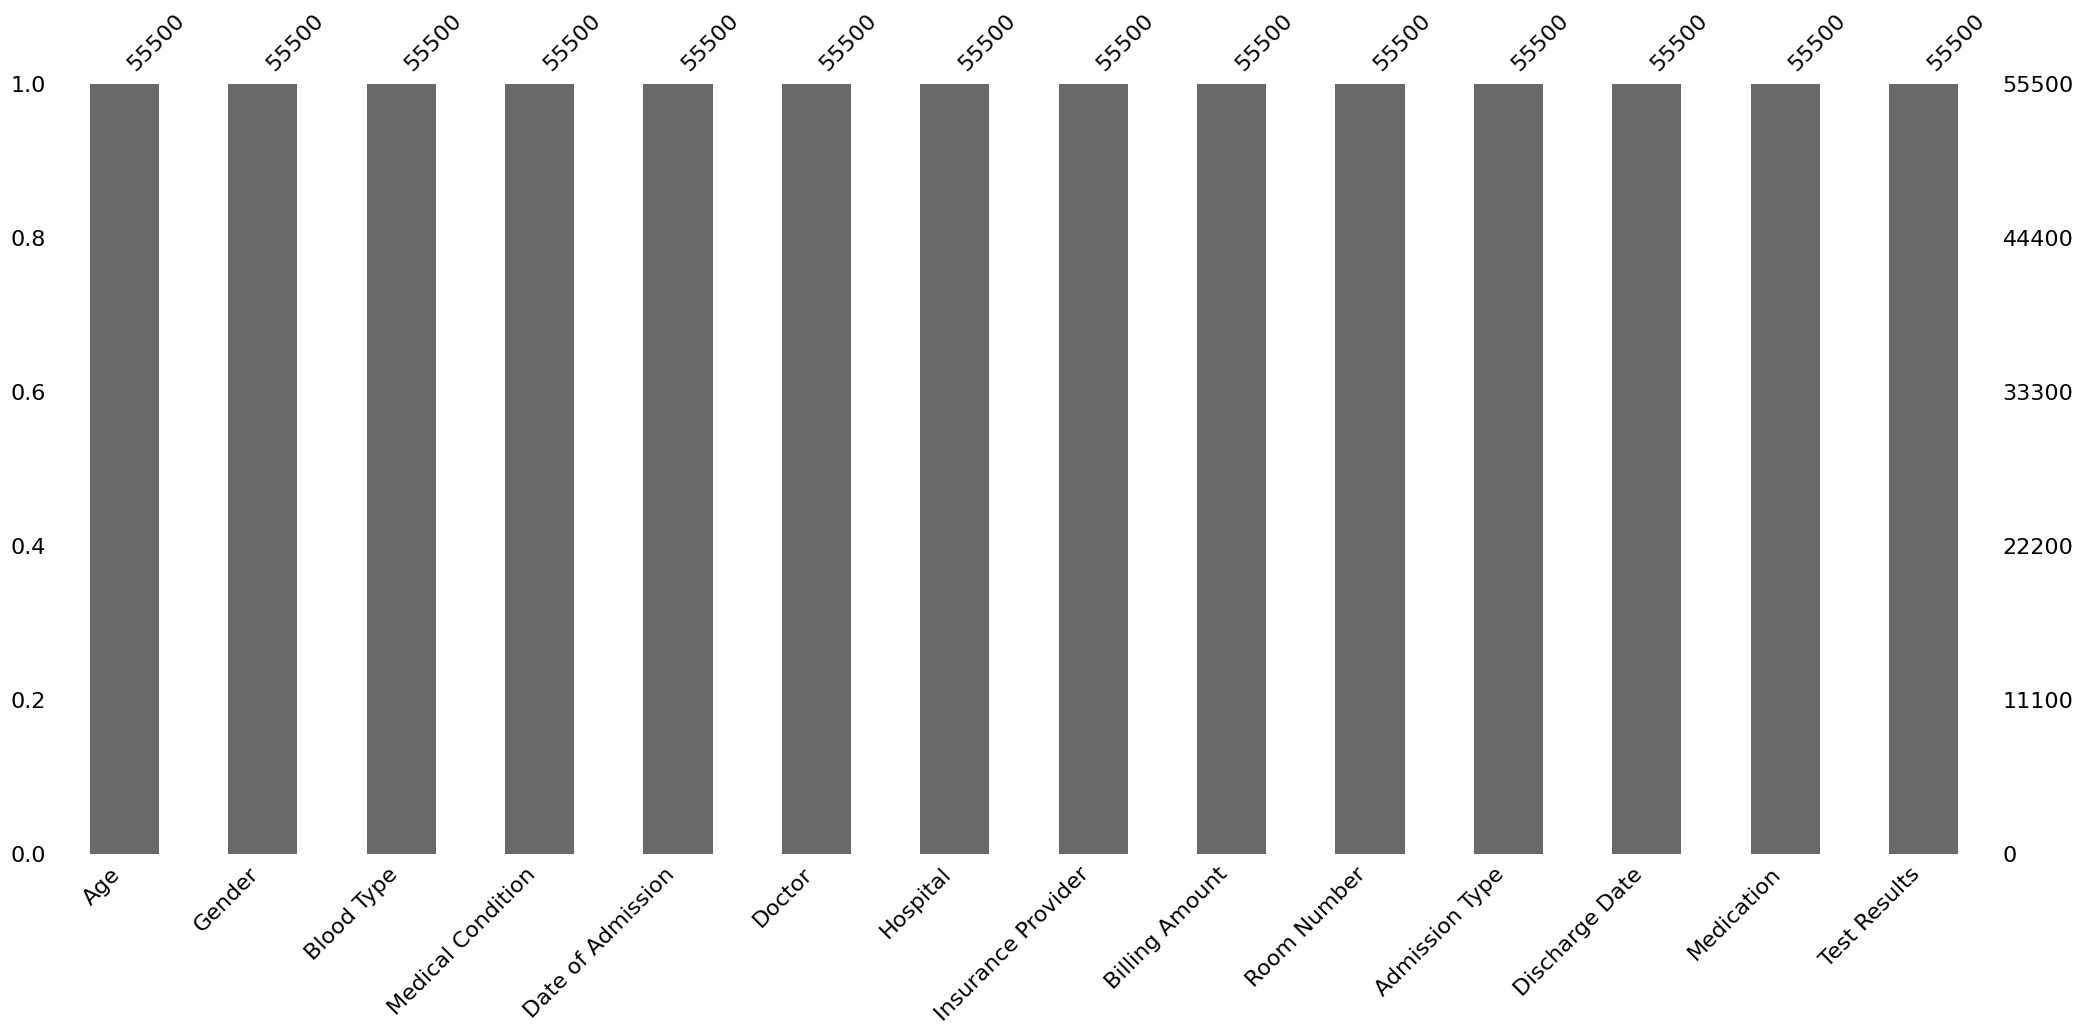

In [9]:
import missingno as msno
msno.bar(health)

In [10]:
health.info

<bound method DataFrame.info of        Age  Gender Blood Type Medical Condition Date of Admission  \
0       30    Male         B-            Cancer        2024-01-31   
1       62    Male         A+           Obesity        2019-08-20   
2       76  Female         A-           Obesity        2022-09-22   
3       28  Female         O+          Diabetes        2020-11-18   
4       43  Female        AB+            Cancer        2022-09-19   
...    ...     ...        ...               ...               ...   
55495   42  Female         O+            Asthma        2020-08-16   
55496   61  Female        AB-           Obesity        2020-01-23   
55497   38  Female         B+      Hypertension        2020-07-13   
55498   43    Male         O-         Arthritis        2019-05-25   
55499   53  Female         O+         Arthritis        2024-04-02   

                 Doctor                      Hospital Insurance Provider  \
0         Matthew Smith               Sons and Miller         Blue Cross   
1       Samantha Davies                       Kim Inc           Medicare   
2      Tiffany Mitchell                      Cook PLC              Aetna   
3           Kevin Wells    Hernandez Rogers and Vang,           Medicare   
4        Kathleen Hanna                   White-White              Aetna   
...                 ...                           ...                ...   
55495     Joshua Jarvis                Jones-Thompson         Blue Cross   
55496   Taylor Sullivan                  Tucker-Moyer              Cigna   
55497    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   UnitedHealthcare   
55498    Kimberly Curry      Jackson Todd and Castro,           Medicare   
55499     Dennis Warren                Henry Sons and              Aetna   

       Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0        18856.281306          328         Urgent     2024-02-02  Paracetamol   
1        33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2        27955.096079          205      Emergency     2022-10-07      Aspirin   
3        37909.782410          450       Elective     2020-12-18    Ibuprofen   
4        14238.317814          458         Urgent     2022-10-09   Penicillin   
...               ...          ...            ...            ...          ...   
55495     2650.714952          417       Elective     2020-09-15   Penicillin   
55496    31457.797307          316       Elective     2020-02-01      Aspirin   
55497    27620.764717          347         Urgent     2020-08-10    Ibuprofen   
55498    32451.092358          321       Elective     2019-05-31    Ibuprofen   
55499     4010.134172          448         Urgent     2024-04-29    Ibuprofen   

       Test Results  
0            Normal  
1      Inconclusive  
2            Normal  
3          Abnormal  
4          Abnormal  
...             ...  
55495      Abnormal  
55496        Normal  
55497      Abnormal  
55498      Abnormal  
55499      Abnormal  

[55500 rows x 14 columns]>

In [11]:
obj=list (health.describe(include=['O']))
obj

['Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [12]:
health['Gender'] =health['Gender'].replace({'Male': 1, 'Female': 0})
health['Medical Condition'] = health['Medical Condition'].replace({'Diabetes': 0, 'Hypertension': 1, 'Asthma': 2})
health['Hospital'] = health['Hospital'].replace({'City Hospital': 0, 'Regional Hospital': 1})

health['Admission Type'] = health['Admission Type'].replace({'Emergency': 0, 'Elective': 1, 'Urgent': 2})
health['Test Results']=health['Test Results'].replace({'Positive': 0, 'Negative': 1})

health['Blood Type']=health['Blood Type'].replace({'A+': 0, 'B+': 1, 'AB+': 2, 'O+': 3, 'A-': 4, 'B-': 5, 'AB-': 6, 'O-': 7})
health

<ipython-input-12-8199a579a843>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health['Gender'] =health['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-12-8199a579a843>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health['Admission Type'] = health['Admission Type'].replace({'Emergency': 0, 'Elective': 1, 'Urgent': 2})
<ipython-input-12-8199a579a843>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,1,5,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,2,2024-02-02,Paracetamol,Normal
1,62,1,0,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,0,2019-08-26,Ibuprofen,Inconclusive
2,76,0,4,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,0,2022-10-07,Aspirin,Normal
3,28,0,3,0,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,1,2020-12-18,Ibuprofen,Abnormal
4,43,0,2,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,2,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,0,3,2,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,1,2020-09-15,Penicillin,Abnormal
55496,61,0,6,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,1,2020-02-01,Aspirin,Normal
55497,38,0,1,1,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,2,2020-08-10,Ibuprofen,Abnormal
55498,43,1,7,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,1,2019-05-31,Ibuprofen,Abnormal


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
# prompt: now split into features and targets

# Assuming 'Billing Amount' is the target variable
features = health.drop('Billing Amount', axis=1)
target = health['Billing Amount']

print("\nFeatures (X) shape:", features.shape)
print("Target (y) shape:", target.shape)
print("\nFirst 5 rows of Features:")
print(features.head())
print("\nFirst 5 rows of Target:")
print(target.head())


Features (X) shape: (55500, 13)
Target (y) shape: (55500,)

First 5 rows of Features:
   Age  Gender  Blood Type Medical Condition Date of Admission  \
0   30       1           5            Cancer        2024-01-31   
1   62       1           0           Obesity        2019-08-20   
2   76       0           4           Obesity        2022-09-22   
3   28       0           3                 0        2020-11-18   
4   43       0           2            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Room Number  Admission Type Discharge Date   Medication  Test Results  
0          328      

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming features and target are already defined from the preceding code
# Assuming features is your DataFrame of independent variables
# Assuming target is your Series of the dependent variable ('Billing Amount')

# Drop irrelevant columns
features_processed = features.drop(columns=['Date of Admission', 'Doctor', 'Hospital', 'Discharge Date'])


# Identify categorical and numerical columns
categorical_cols = features_processed.select_dtypes(include=['object']).columns
numerical_cols = features_processed.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical columns
features_processed = pd.get_dummies(features_processed, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
features_processed[numerical_cols] = scaler.fit_transform(features_processed[numerical_cols])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_processed, target, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# --- Define a Multi-Stream Model ---

# Let's create a simple example of a multi-stream model.
# We'll split the features into two arbitrary "streams" for demonstration.
# In a real scenario, you would split based on logical groups of features
# (e.g., demographic features, clinical features, etc.).

# For this example, let's split the features into the first half and the second half
num_features = X_train.shape[1]
split_point = num_features // 2

input_stream1 = Input(shape=(split_point,), name='stream1_input')
input_stream2 = Input(shape=(num_features - split_point,), name='stream2_input')

# Stream 1
x1 = Dense(32, activation='relu')(input_stream1)
x1 = Dense(16, activation='relu')(x1)

# Stream 2
x2 = Dense(32, activation='relu')(input_stream2)
x2 = Dense(16, activation='relu')(x2)

# Concatenate the outputs of the two streams
merged = concatenate([x1, x2])

# Common layers after merging
z = Dense(16, activation='relu')(merged)
# Output layer (assuming regression for 'Billing Amount')
output = Dense(1, activation='linear', name='output')(z)

# Create the model
model = Model(inputs=[input_stream1, input_stream2], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model architecture
model.summary()

# Prepare data for multi-stream input
# We need to split X_train and X_test according to the streams
X_train_stream1 = X_train.iloc[:, :split_point]
X_train_stream2 = X_train.iloc[:, split_point:]
X_test_stream1 = X_test.iloc[:, :split_point]
X_test_stream2 = X_test.iloc[:, split_point:]

print("\nX_train_stream1 shape:", X_train_stream1.shape)
print("X_train_stream2 shape:", X_train_stream2.shape)
print("X_test_stream1 shape:", X_test_stream1.shape)
print("X_test_stream2 shape:", X_test_stream2.shape)


# Train the model
history = model.fit(
    [X_train_stream1, X_train_stream2],
    y_train,
    validation_split=0.2,  # Use a validation split from the training data
    epochs=5,             # You can adjust the number of epochs
    batch_size=32          # You can adjust the batch size
)

# Evaluate the model on the test set
loss, mae = model.evaluate([X_test_stream1, X_test_stream2], y_test, verbose=0)

print(f'\nTest Loss (MSE): {loss:.4f}')
print(f'Test MAE: {mae:.4f}')


X_train shape: (44400, 20)
X_test shape: (11100, 20)
y_train shape: (44400,)
y_test shape: (11100,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ stream1_input       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stream2_input       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        352 │ stream1_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │        352 │ stream2_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │        528 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32)        │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        528 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         17 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)


X_train_stream1 shape: (44400, 10)
X_train_stream2 shape: (44400, 10)
X_test_stream1 shape: (11100, 10)
X_test_stream2 shape: (11100, 10)
Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 678064768.0000 - mae: 21960.5977 - val_loss: 216008448.0000 - val_mae: 12635.4951
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 213249760.0000 - mae: 12500.5527 - val_loss: 212763184.0000 - val_mae: 12571.3984
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 210271184.0000 - mae: 12465.5332 - val_loss: 210841264.0000 - val_mae: 12532.3291
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 209457696.0000 - mae: 12465.8887 - val_loss: 209480768.0000 - val_mae: 12506.4404
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 207513264.0000 - mae: 12412.3350 - val_loss: 209052160.0000 - val_mae: 12489.6221

Test Loss (MSE): 204491808.0000
Test MAE: 12310.7734


In [16]:
# prompt: now make predictions on this

# Make predictions on the test set
predictions = model.predict([X_test_stream1, X_test_stream2])

print("\nFirst 10 predictions:")
print(predictions[:10].flatten())

# You can compare these predictions to the actual values (y_test)
print("\nFirst 10 actual values (y_test):")
print(y_test[:10].values)

# Optionally, evaluate performance metrics on the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_pred = mean_absolute_error(y_test, predictions)
mse_pred = mean_squared_error(y_test, predictions)
r2_pred = r2_score(y_test, predictions)

print(f'\nMAE on test predictions: {mae_pred:.4f}')
print(f'MSE on test predictions: {mse_pred:.4f}')
print(f'R-squared on test predictions: {r2_pred:.4f}')


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

First 10 predictions:
[19875.83  19317.88  27815.375 24360.55  24831.09  24357.436 25652.084
 21153.746 27013.502 25492.11 ]

First 10 actual values (y_test):
[ 3616.89845    36970.07548148 44393.00134769 27554.92370773
 27466.31856706  4802.62071373 40207.46321828 30065.26059783
   392.91354813 20886.3421484 ]

MAE on test predictions: 12310.7718
MSE on test predictions: 204491790.2307
R-squared on test predictions: -0.0281


In [17]:
# prompt: now make predictions on this

# Make predictions on the test set
predictions = model.predict([X_test_stream1, X_test_stream2])

print("\nFirst 10 predictions:")
print(predictions[:10].flatten())

# You can compare these predictions to the actual values (y_test)
print("\nFirst 10 actual values (y_test):")
print(y_test[:10].values)

# Optionally, evaluate performance metrics on the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_pred = mean_absolute_error(y_test, predictions)
mse_pred = mean_squared_error(y_test, predictions)
r2_pred = r2_score(y_test, predictions)

print(f'\nMAE on test predictions: {mae_pred:.4f}')
print(f'MSE on test predictions: {mse_pred:.4f}')
print(f'R-squared on test predictions: {r2_pred:.4f}')


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

First 10 predictions:
[19875.83  19317.88  27815.375 24360.55  24831.09  24357.436 25652.084
 21153.746 27013.502 25492.11 ]

First 10 actual values (y_test):
[ 3616.89845    36970.07548148 44393.00134769 27554.92370773
 27466.31856706  4802.62071373 40207.46321828 30065.26059783
   392.91354813 20886.3421484 ]

MAE on test predictions: 12310.7718
MSE on test predictions: 204491790.2307
R-squared on test predictions: -0.0281


In [18]:
# prompt: now make predictions on this

# Make predictions on the test set
predictions = model.predict([X_test_stream1, X_test_stream2])

print("\nFirst 10 predictions:")
print(predictions[:10].flatten())

# You can compare these predictions to the actual values (y_test)
print("\nFirst 10 actual values (y_test):")
print(y_test[:10].values)

# Optionally, evaluate performance metrics on the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_pred = mean_absolute_error(y_test, predictions)
mse_pred = mean_squared_error(y_test, predictions)
r2_pred = r2_score(y_test, predictions)

print(f'\nMAE on test predictions: {mae_pred:.4f}')
print(f'MSE on test predictions: {mse_pred:.4f}')
print(f'R-squared on test predictions: {r2_pred:.4f}')

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

First 10 predictions:
[19875.83  19317.88  27815.375 24360.55  24831.09  24357.436 25652.084
 21153.746 27013.502 25492.11 ]

First 10 actual values (y_test):
[ 3616.89845    36970.07548148 44393.00134769 27554.92370773
 27466.31856706  4802.62071373 40207.46321828 30065.26059783
   392.91354813 20886.3421484 ]

MAE on test predictions: 12310.7718
MSE on test predictions: 204491790.2307
R-squared on test predictions: -0.0281


In [19]:
features = health.drop('Billing Amount', axis=1)
target = health['Billing Amount']

print("\nFeatures (X) shape:", features.shape)
print("Target (y) shape:", target.shape)
print("\nFirst 5 rows of Features:")
print(features.head())
print("\nFirst 5 rows of Target:")
print(target.head())

# --- Add a check for object data types and handle them ---
print("\nChecking dtypes of features before training:")
print(features.dtypes)


Features (X) shape: (55500, 13)
Target (y) shape: (55500,)

First 5 rows of Features:
   Age  Gender  Blood Type Medical Condition Date of Admission  \
0   30       1           5            Cancer        2024-01-31   
1   62       1           0           Obesity        2019-08-20   
2   76       0           4           Obesity        2022-09-22   
3   28       0           3                 0        2020-11-18   
4   43       0           2            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Room Number  Admission Type Discharge Date   Medication  Test Results  
0          328      

In [24]:
print(features_processed.columns)

Index(['Age', 'Gender', 'Blood Type', 'Room Number', 'Admission Type',
       'Medical Condition_1', 'Medical Condition_2',
       'Medical Condition_Arthritis', 'Medical Condition_Cancer',
       'Medical Condition_Obesity', 'Insurance Provider_Blue Cross',
       'Insurance Provider_Cigna', 'Insurance Provider_Medicare',
       'Insurance Provider_UnitedHealthcare', 'Medication_Ibuprofen',
       'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin',
       'Test Results_Inconclusive', 'Test Results_Normal'],
      dtype='object')


In [25]:
%pip install gradio

In [26]:
import pandas as pd
import numpy as np
import gradio as gr

def predict_billing_amount(
    Age,
    Gender, # Use the encoded Gender directly
    Blood_Type, # Use the encoded Blood Type directly
    Room_Number,
    Admission_Type, # Use the encoded Admission Type directly
    Medical_Condition, # Single text input for Medical Condition
    Test_Results, # Single text input for Test Results
    Insurance_Provider, # Single text input for Insurance Provider
    Medication # Single text input for Medication

):
    # Map text inputs for Medical Condition, Test Results, Insurance Provider, and Medication
    # to the one-hot encoded column names present in features_processed
    condition_mapping = {
        'Arthritis': 'Medical Condition_Arthritis',
        'Asthma': 'Medical Condition_Asthma',
        'Cancer': 'Medical Condition_Cancer',
        'Diabetes': 'Medical Condition_Diabetes',
        'Hypertension': 'Medical Condition_Hypertension',
        'Obesity': 'Medical Condition_Obesity',
    }

    test_mapping = {
        'Inconclusive': 'Test Results_Inconclusive',
        'Normal': 'Test Results_Normal',
    }

    insurance_mapping = {
        'Blue Cross': 'Insurance Provider_Blue Cross',
        'Cigna': 'Insurance Provider_Cigna',
        'Medicare': 'Insurance Provider_Medicare',
        'UnitedHealthcare': 'Insurance Provider_UnitedHealthcare',
    }

    medication_mapping = {
        'Ibuprofen': 'Medication_Ibuprofen',
        'Lipitor': 'Medication_Lipitor',
        'Paracetamol': 'Medication_Paracetamol',
        'Penicillin': 'Medication_Penicillin',
    }


    # Create a DataFrame with all columns initialized to 0, using the columns from features_processed
    input_df = pd.DataFrame(0, index=[0], columns=features_processed.columns)

    # Update the DataFrame with the provided input data for numerical and pre-encoded categorical features
    input_df['Age'] = Age
    input_df['Gender'] = Gender
    input_df['Blood Type'] = Blood_Type
    input_df['Room Number'] = Room_Number
    input_df['Admission Type'] = Admission_Type


    # Set the value to 1 for the selected medical condition, test result, insurance provider, and medication
    if Medical_Condition in condition_mapping:
        input_df[condition_mapping[Medical_Condition]] = 1
    if Test_Results in test_mapping:
        input_df[test_mapping[Test_Results]] = 1
    if Insurance_Provider in insurance_mapping:
        input_df[insurance_mapping[Insurance_Provider]] = 1
    if Medication in medication_mapping:
        input_df[medication_mapping[Medication]] = 1


    # Identify the actual numerical columns in the original data for scaling
    # These are the columns that were scaled with StandardScaler
    original_numerical_cols_for_scaling = numerical_cols # Use the numerical_cols identified earlier

    input_df_scaled = input_df.copy()
    # Scale only the original numerical features that were scaled during training
    input_df_scaled[original_numerical_cols_for_scaling] = scaler.transform(input_df_scaled[original_numerical_cols_for_scaling])


    # Split the input data for the multi-stream model
    input_stream1_data = input_df_scaled.iloc[:, :split_point]
    input_stream2_data = input_df_scaled.iloc[:, split_point:]


    prediction = model.predict([input_stream1_data, input_stream2_data])
    scaled_prediction = prediction[0][0]

    # You might want to inverse transform the scaled prediction if you want the original scale
    # This requires the scaler fitted on the target variable (y_train)
    # If you have scaled y_train, you can use scaler_y.inverse_transform([[scaled_prediction]])
    # For now, we'll return the scaled prediction as the model was trained on scaled features.

    return f"Predicted Billing Amount: {scaled_prediction:.4f}"

# Create a list of input components based on the desired features and their processed column names
# Use gr.Dropdown for categorical features that were one-hot encoded
input_components = [
    gr.Slider(minimum=health['Age'].min(), maximum=health['Age'].max(), step=1, label='Age'),
    gr.Dropdown(choices=health['Gender'].unique().tolist(), label='Gender'),
    gr.Dropdown(choices=health['Blood Type'].unique().tolist(), label='Blood Type'),
    gr.Slider(minimum=health['Room Number'].min(), maximum=health['Room Number'].max(), step=1, label='Room Number'),
    gr.Dropdown(choices=health['Admission Type'].unique().tolist(), label='Admission Type'),
    gr.Dropdown(choices=health['Medical Condition'].unique().tolist(), label='Medical Condition'),
    gr.Dropdown(choices=health['Test Results'].unique().tolist(), label='Test Results'),
    gr.Dropdown(choices=health['Insurance Provider'].unique().tolist(), label='Insurance Provider'),
    gr.Dropdown(choices=health['Medication'].unique().tolist(), label='Medication'),

]


iface = gr.Interface(
    fn=predict_billing_amount,
    inputs=input_components,
    outputs="text",
    title="Healthcare Billing Amount Prediction",
    description="Enter patient data to predict the billing amount using a multi-stream neural network model."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4bd8eb6039b95d7ea4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
